In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

calc_std_fit = lambda x: (x - x.mean()) / x.std()

X_st = X.copy().astype(np.float64)

X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
    return W

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод
#### Решение:

In [5]:
lambda_arr = [0]
lambda_arr.extend([10 ** -i for i in range(20, 0, -1)])
lambda_arr.extend([round(l, 1) for l in np.arange(0.2, 1, 0.1)])
lambda_arr.extend([i for i in range(1, 100)])

w1, w2, w3 = [], [], []

for l in lambda_arr:
    W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    w1.append(W[1])
    w2.append(W[2])
    w3.append(W[3])

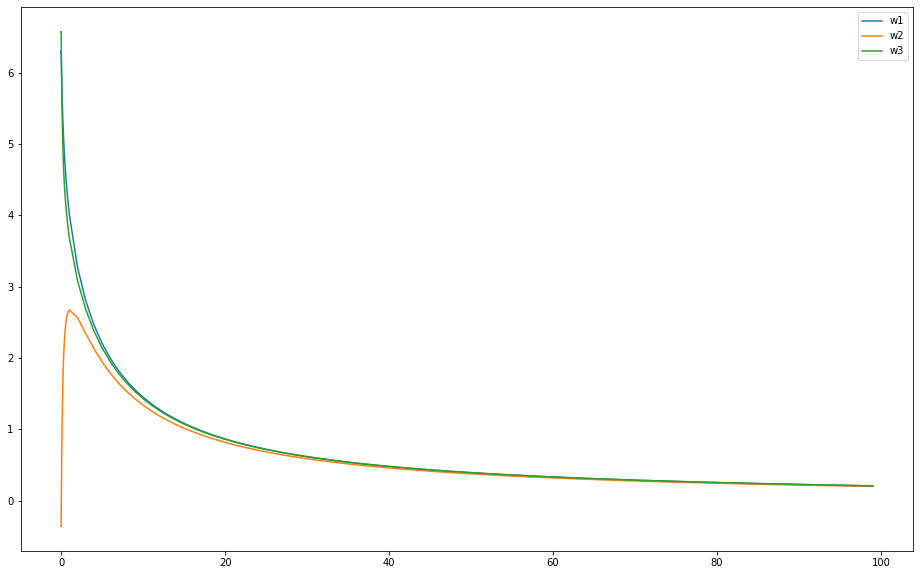

In [6]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=1)

ax.plot(lambda_arr, w1, label='w1')
ax.plot(lambda_arr, w2, label='w2')
ax.plot(lambda_arr, w3, label='w3')
ax.autoscale(enable=True) 

plt.legend()
plt.show()

#### Вывод: в данной задаче с повышением коэффициента $ \lambda $ веса сходятся в нуле. Причем влияние ошибки на 1-й и 3-й признаки сильно коррелирует для всех значений $ \lambda $. 

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
#### Решение:

#### Технически ограничений нет, но это не имеет практического смысла, так как у них разное назначение и применение одного способа нивелирует использование другого. При использовании нескольких методов не сохранятся обусловленные конкретным методом отношения значений признака.

### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.
#### Решение:

In [7]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_*np.sign(W)) 
    return W

In [8]:
lambda_arr = [i for i in range(0, 51)]

w1, w2, w3 = [], [], []

for l in lambda_arr:
    W = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
    w1.append(W[1])
    w2.append(W[2])
    w3.append(W[3])

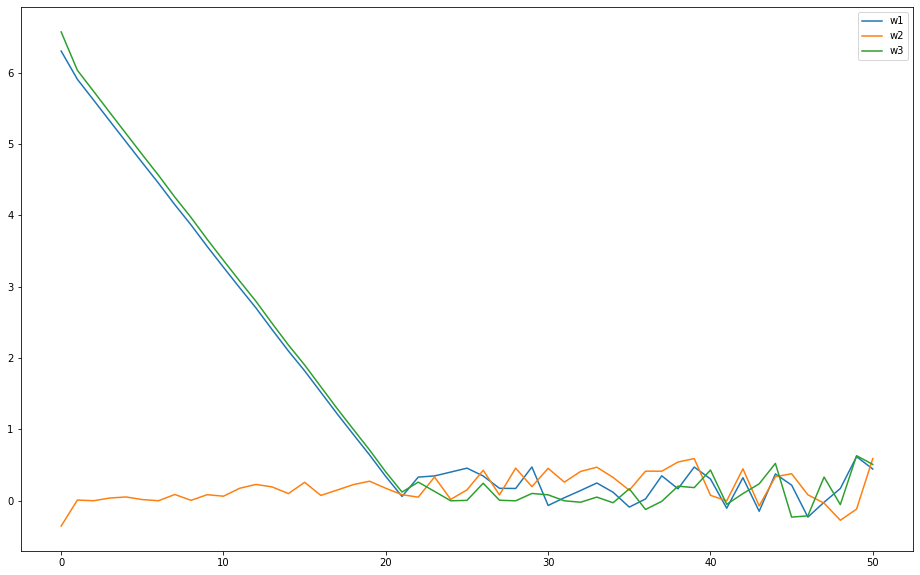

In [9]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=1)

ax.plot(lambda_arr, w1, label='w1')
ax.plot(lambda_arr, w2, label='w2')
ax.plot(lambda_arr, w3, label='w3')
ax.autoscale(enable=True) 

plt.legend()
plt.show()